# Quantum Computing (บทที่ 1)

การคำนวณเชิงควอนตัม (Quantum Computing) คือ การใช้คุณสมบัติจาก กลศาสตร์ควอนตัม (Quantum Machanic) เช่น superposition, entanglement, quantum tunneling เพื่อเพิ่มประสิทธิภาพในการคำนวณ ซึ่งลดเวลาในการคำนวณจากคอมพิวเตอร์ปกติอย่างมาก

การคำนวณเชิงควอนตัมจะใช้ สถานะทางควอนตัน (Quantum states) ที่แสดงด้วย เวคเตอร์ของจำนวนเชิงซ้อน (Complex vecotr) เพื่อการคำนวณแทนที่จะใช้ เลขฐานสอง (Binary number) เหมือนคอนพิวเตอร์ปกติ

## 1.1 The qubit

คิวบิต (qubit) ย่อมาจาก ควอนตัมบิต (Quantum bit) ซึ่งเป็นตัวแทน สถานะทางควอนตัม สามารถเขียนให้อยู่ในรูป เวคเตอร์ของจำนวนเชิงซ้อน 2 มิติ ซึ่งจะเรียกว่า สถานะ 1 คิวบิต (Single qubit state) นิยามได้ดังนี้

$$\lvert\phi\rangle = \alpha\lvert 0\rangle + \beta\lvert 1\rangle$$

โดยที่ $\alpha, \beta$ เป็นจำนวนเชิงซ้อน (Complex number) ซึ่ง $|\alpha|^2 + |\beta|^2 = 1$ 

และ $\lvert 0\rangle = \begin{bmatrix}1\\0\end{bmatrix}, \lvert 1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$ (ถูกเรียกว่า ket 0, ket 1 ตามลำดับ)

เราจะสังเกตเห็นได้ว่า $\lvert\phi\rangle$ เป็นการผสมของสถานะ $\lvert 0\rangle, \lvert 1\rangle$ หรือ สถานะบิตสตริง (bit-string states)

และ $|\alpha|^2$ คือค่าความน่าจะเป็น ที่ $\phi$ จะคืนค่าสถานะเป็น $\lvert 0\rangle$ เมื่อ $\phi$ ถูกวัด (Measuring a qubit)

และ $|\beta|^2$ คือค่าความน่าจะเป็น ที่ $\phi$ จะคืนค่าสถานะเป็น $\lvert 1\rangle$  เมื่อ $\phi$ ถูกวัด (Measuring a qubit)

In [1]:
import numpy as np #lib สำหรับสร้าง เวคเตอร์และการคำนวณเชิงเวคเตอร์

In [2]:
#มาลองสร้าง qubit กัน

#สร้าง ket
ket_0 = np.array([[1], [0]])
ket_1 = np.array([[0], [1]])

#สร้าง alpha, beta
alpha = 1 / (2**0.5)
beta = 1 / (2**0.5)

In [3]:
#พิสูจน์ว่า  alpha ** 2 + beta ** 2 == 1
alpha ** 2 + beta ** 2

0.9999999999999998

In [4]:
#สร้าง qubit  phi
phi = alpha * ket_0 + beta * ket_1
print(phi)

[[0.70710678]
 [0.70710678]]


# 1.2 System of qubits

สถานะควอนตัม(Quantum states) ไดๆ เป็นเวคเตอร์มาตรฐาน (normalized vector) ในปริภูมิเชิงซ้อน (complex vector space) ทำให้ผลรวมความน่าจะเป็นของแต่ละสถานะมีผลรวมเท่ากับ $1$

ในควอนตัมคอมพิวเตอร์ (Quantum Computer) สามารถมีจำนวนคิวบิตได้มากกว่า $1$ เรียกว่า ระบบของคิวบิต (System of qubits) ซึ่งทำให้เกิดสถานะทางควอนตัมเพิ่มขึ้นมาเป็น $2^n$ เมื่อ $n$ เป็นจำนวนคิวบิตในระบบคิวบิต

เราสามารถสร้างสถานะทางควอนตัมของระบบคิวบิตที่มีสองคิวบิต โดยใช้ เทนเซอร์โปรดัคท์ (tensor product, $\otimes$) นิยามได้ดังนี้


ให้ $\lvert\phi\rangle = \begin{bmatrix}\alpha\\ \beta\end{bmatrix}$ และ
$\lvert\acute{\phi}\rangle = \begin{bmatrix}\acute{\alpha}\\ \acute{\beta}\end{bmatrix}$ แล้ว

$$\lvert\phi\rangle\otimes\lvert\acute{\phi}\rangle =  \begin{bmatrix}\alpha\\ \beta\end{bmatrix} \otimes\begin{bmatrix}\acute{\alpha}\\ \acute{\beta}\end{bmatrix} = \begin{bmatrix}\alpha\acute{\alpha}\\ \alpha\acute{\beta}\\ \beta\acute{\alpha}\\ \beta\acute{\beta}\end{bmatrix}$$

โดยทั่วไปเราสามารถเขียนเทนเซอร์โปรดัคท์ของสองคิวบิตแบบสั้นได้ดังนี้ $\lvert\phi\rangle\otimes\lvert\acute{\phi}\rangle = \lvert \phi\acute{\phi}\rangle$ ซึ่งการคำนวณเทนเซอร์โปรดัคท์ของ $2$ คิวบิตถูกเรียกว่า Kronecker product

ตัวอย่างโค้ด 
1. จงคำนวณ $\lvert 10 \rangle$
2. จงคำนวณ $\lvert 000 \rangle$

In [5]:
#ข้อ 1
np.kron(ket_0,ket_1)

array([[0],
       [1],
       [0],
       [0]])

In [6]:
#ข้อ 2
np.kron(np.kron(ket_0, ket_0), ket_0)

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

สถานะใหม่ของระบบของคิวบิตที่ถูกนิยามด้วยการคูณเทนเซอร์โปรดัคท์ของสถานะทั้งหมดในระบบ จะถูกเรียกว่า สถานะร่วม (joint state)

ตัวอย่างของ สถานะร่วม

กำหนดให้ $\lvert \gamma_j\rangle = \alpha_j\lvert 0\rangle + \beta_j \lvert 1\rangle$ สำหรับ $j = 1,2,3$ สถานะร่วมของสามคิวบิตนี้คือ

$\begin{align}\lvert \gamma_1\gamma_2\gamma_3\rangle &=
\lvert\gamma_1\rangle\otimes\lvert\gamma_2\rangle\otimes\lvert\gamma_3\rangle\\
&=\alpha_1\alpha_2\alpha_3\lvert 000\rangle+
\alpha_1\alpha_2\beta_3\lvert 001\rangle+
\alpha_1\beta_2\alpha_3\lvert 010\rangle+
\beta_1\alpha_2\alpha_3\lvert 100\rangle\\
&+\beta_1\beta_2\beta_3\lvert 111\rangle+
\beta_1\beta_2\alpha_3\lvert 110\rangle+
\beta_1\alpha_2\beta_3\lvert 101\rangle+
\alpha_1\beta_2\beta_3\lvert 011\rangle
\end{align}$

จะเห็นได้ว่า ระบบคิวบิตข้างต้นมี $3$ คิวบิตทำให้มีสถานะร่วม ซึ่งเกิดจากผลรวมของสถานะตามสมการทั้งหมด $2^3 = 8$ สถานะ โดยทั้ง $8$ สถานะเป็น เวคเตอร์เบสิส (basis vector) (กล่าวคือเป็นเวคเตอร์ขนาด 1 หน่วย(unit vector) และเวคเตอร์ทั้ง $8$ ตั้งฉากกัน (orthogonal)) เราจะเรียกสถานะทั้ง $8$ นี้เป็น สถานะเบสิส (basis states)

และแต่ละสถานะมีค่าสัมประสิทธิ์ของตัวเอง ซึ่งนำผลรวมทั้งหมดของค่าสัมบูรณ์ของสัมประสิทธิ์ยกกำลังสองจะมีค่าเท่ากับ $1$ 

ตัวอย่างโค้ด 

3. กำหนดให้ $\lvert\phi\rangle = \frac{1}{\sqrt{2}}\lvert 0\rangle + \frac{1}{\sqrt{2}}\lvert 1\rangle$ จงคำนวณ $\lvert\phi 0 1\rangle$ และเช็คว่าผลรวมทั้งหมดของค่าสัมบูรณ์ของสัมประสิทธิ์ยกกำลังสองมีค่าเท่ากับ $1$ หรือไม่

In [7]:
#ข้อ 3
result = np.kron(np.kron(phi, ket_0), ket_1)

In [8]:
result

array([[0.        ],
       [0.70710678],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.70710678],
       [0.        ],
       [0.        ]])

In [9]:
np.abs(result) ** 2

array([[0. ],
       [0.5],
       [0. ],
       [0. ],
       [0. ],
       [0.5],
       [0. ],
       [0. ]])

In [10]:
sum(np.abs(result) ** 2)

array([1.])

# 1.3 Superposition and entanglement

จากบท 1.2 จะพบว่าเราสามารถสร้าง สถานะร่วม $n$ คิวบิต ได้โดยหาผลคูณเทนเซอร์โปรดัคท์ของ $n$ คิวบิต อย่างไรก็ตามจะมีบาง สถานะควอนตัม ซึ่งไม่สามารถเขียนแสดงให้อยู่ในรูปของผลคูณเทนเซอร์โปรดัคท์ของ $n$ คิวบิตได้ ซึ่งเราจะเรียกมันว่า สถานะพัวพัน(entangled states) ยกตัวอย่างเช่น

$$\lvert \Psi\rangle = \frac{1}{\sqrt{2}}(\lvert000\rangle + \lvert111\rangle)$$

การพัวพัน(Entanglement) สามารถสร้าง $2^n$ มิติในปริภูมิเชิงซ้อนโดยใช้เพียงจำนวน $n$ คิวบิตเพื่อให้เราใช้คำนวณในมัน ทำให้คอวนตัมคอมพิวเตอร์มีความสามารถบางอย่างมากกว่าคอมพิวเตอร์ทั่วไป

ตัวอย่างโค้ด 

4. จงสร้าง สถานะพัวพัน $\lvert \Psi\rangle = \frac{1}{\sqrt{2}}(\lvert000\rangle + \lvert111\rangle)$

In [11]:
Psi = 1/np.sqrt(2) * (np.kron(np.kron(ket_0, ket_0), ket_0) + np.kron(np.kron(ket_1, ket_1), ket_1))
print(Psi)

[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]]


# 1.4 Inner and outer products
- สังยุคเชิงซ้อน (complex conjugte)

กำหนดให้ $\lvert\phi\rangle = \begin{bmatrix}\alpha\\ \beta\end{bmatrix}$ (ถูกเรียกว่า ket), จะได้ว่า   $\langle\phi\rvert = [\alpha^*\quad\beta^*]$ (ถูกเรียกว่า bra) โดย $^*$ คือการสังยุคเชิงซ้อน
- อินเนอร์โปรดัคท์ (Inner product) คือ การซ้อนทับ(overlaping) กันระหว่างสองสถานะควอนตัม

กำหนดให้ $\lvert\phi\rangle = \alpha\lvert0\rangle + \beta\lvert1\rangle$ และ $\lvert\psi\rangle = \gamma\lvert0\rangle + \delta\lvert1\rangle$ การทับซ้อนของสองสถานะคือ 

$$\langle\psi\lvert\phi\rangle =[\gamma^*\quad\delta^*]\begin{bmatrix}\alpha\\ \beta\end{bmatrix}= \gamma^*\alpha + \delta^*\beta$$

- เอาท์เตอร์โปรดัคท์ (outer product) เป็นการดำเนินการ(operation) ที่สำคัญตัวหนึ่งที่มีผลลัพธ์เป็นเมทริกซ์(Matrix)  

กำหนดให้ $\lvert\phi\rangle = \alpha\lvert0\rangle + \beta\lvert1\rangle$ และ $\lvert\psi\rangle = \gamma\lvert0\rangle + \delta\lvert1\rangle$ เอาท์เตอร์โปรดัคท์นิยามโดย 

$$\lvert\psi\rangle\langle\phi\rvert =\begin{bmatrix}\gamma\\ \delta\end{bmatrix}[\alpha^*\quad\beta^*]= \begin{bmatrix}\gamma\alpha^* & \gamma\beta^* \\ \delta\alpha^* &  \delta\beta^*\end{bmatrix}$$

นอกจากนี้ เมทริกซ์ไดๆ สามารถเขียนให้อยู่ในรูปผลรวมของการดำเนินการเอาท์เตอร์โปรดัคท์ได้

ยกตัวอย่างเช่น

$$A = \begin{bmatrix}A_{00} & A_{01}\\A_{10} &A_{11}\end{bmatrix} = 
A_{00}\lvert0\rangle\langle0\rvert+
A_{01}\lvert0\rangle\langle1\rvert+
A_{10}\lvert1\rangle\langle0\rvert+
A_{11}\lvert1\rangle\langle1\rvert
$$

การแปลงเมทริกซ์ให้อยู่ในรูปผลรวมของการดำเนินการเอาท์เตอร์โปรดัคท์ ทำให้เราสามารถทำการคูณเมทริกซ์กับสถานะควอนตัมได้ ดังแสดงในตัวอย่างนี้

$$\begin{align}
A\lvert\phi\rangle &= 
A_{00}\lvert0\rangle\langle0\rvert\phi\rangle+
A_{01}\lvert0\rangle\langle1\rvert\phi\rangle+
A_{10}\lvert1\rangle\langle0\rvert\phi\rangle+
A_{11}\lvert1\rangle\langle1\rvert\phi\rangle\\\\
&=
A_{00}\lvert0\rangle\alpha+
A_{01}\lvert0\rangle\beta+
A_{10}\lvert1\rangle\alpha+
A_{11}\lvert1\rangle\beta
\\\\
&=
\begin{bmatrix}
A_{00}\alpha + A_{01}\beta\\
A_{10}\alpha + A_{11}\beta|
\end{bmatrix}
\end{align}
$$

ตัวอย่างโค้ด

5. กำหนดให้ $\lvert\phi\rangle = \frac{1}{\sqrt{2}}\lvert 0\rangle + \frac{1}{\sqrt{2}}\lvert 1\rangle$ และ $H = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}$ จงคำนวณ $H\lvert\phi\rangle$

In [12]:
H = 1/2**0.5 * np.array([[1, 1],
                         [1,-1]])

In [13]:
H @ phi

array([[1.],
       [0.]])

# 1.5 Measurement

การวัด(Measurement) คือการแปลง ข้อมูลเชิงควอนตัม(Quantum information) ที่อยู่ในระบบควอนตัมซึ่งอยู่ในรูปเวคเตอร์ให้อยู่ในรูปของ ข้อมูลดั้งเดิม(Classical information) โดยมีผลลัพธ์เป็นความน่าจะเป็นว่า**สถานะควอนตัมที่สนใจ**จะกลายเป็น**สถานะที่ต้องการวัด**เท่าไดเมื่อถูกวัด

โดยวิธีการวัดเราจะใช้ อินเนอร์โปรดัคท์กับสถานะ 1 คิวบิต โดย
- ความน่าจะเป็นที่ สถานะ $\lvert\phi\rangle$ จะกลายเป็น $\lvert0\rangle$ เมื่อถูกวัด คือ $|\langle0\rvert\phi\rangle|^2$

- ความน่าจะเป็นที่ สถานะ $\lvert\phi\rangle$ จะกลายเป็น $\lvert1\rangle$ เมื่อถูกวัด คือ $|\langle1\rvert\phi\rangle|^2$

ดังนั้นการวัดความน่าจะเป็นสามารถแทนด้วย ค่าสัมบูรณ์กำลังสอง(squared absolute values) ของอินเนอร์โปรดัคท์

ต่อไปเราจะพิจารณาตัวอย่างที่อยู่ใรูปทั่วไปมากขึ้น สมมติให้ $\lvert\Psi\rangle$ เป็นสถานะ 3 คิวบิตและต้องการที่จะวัดความน่าจะเป็นว่าคิวบิตตัวแรกจะเป็น $\lvert0\rangle$ คือเท่าไร ซึ่งสามารถหาได้ตามสมการนี้

$$\sum_{(x_2,x_3) \in \{0,1\}^2} |\langle0x_2x_3\lvert\Psi\rangle|^2$$

และสถานะของระบบหลังถูกวัด สามารถคำนวณได้จาก การนอมอไรซ์(normalizing) สถานะที่ถูกวัด โดย

$$\sum_{(x_2,x_3) \in \{0,1\}^2} \langle0x_2x_3\lvert\Psi\rangle\lvert0x_2x_3\rangle$$

ตัอย่างโค้ด

6. กำหนดให้ $\lvert \Psi\rangle = \frac{1}{\sqrt{2}}(\lvert000\rangle + \lvert111\rangle)$ จงหาความน่าจะเป็นที่คิวบิตตัวแรกเป็น $0$ และทำการนอมอไรซ์สถานะ $\Psi$

In [14]:
from itertools import product

In [15]:
def ket(list_num):
    I = 1
    for i in list_num:
        if i == 0:
            I = np.kron(I, ket_0)
        else:
            I = np.kron(I, ket_1)
    return I

In [16]:
ket_list = [ket(d) for d in product([0,1], [0,1], [0,1]) if d[0]==0]

In [17]:
Prop = sum([abs(k.T @ Psi)**2 for k in ket_list])
print(Prop)

[[0.5]]


In [18]:
after_state = sum([k.T @ Psi * k for k in ket_list])
print(after_state)

[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


#  1.6 Unitary transformations and gates

- ยูนิทารีเมทริกซ์(Unitary matrix) 

ให้ $U$ เมทริกซ์ที่สมาชิกเป็นจำนวนเชิงซ้อน $U$ เป็นยูนิทารีเมทริกซ์ถ้า

$$UU^\dagger = U^\dagger U = I$$

เมื่อ $U^\dagger$ เป็น เมทริกซ์สลับเปลี่ยนสังยุค(transposed, complex conjugate matrix)ของ $U$ และ $I$ คือ เมทริกซ์เอกลักษณ์(Identity matrix)

- การแปลงยูนิทารี(Unitary transformation) 
    * การแปลงยูนิทารีเป็นยูนิทารีเมทริกซ์
    * คิวบิตหรือระบบของคิวบิต จะเกิดเปลี่ยนสถานะของมันเองได้โดยการผ่าน อนุกรมของการแปลงยูนิทารี
    
กำหนดให้ คิวบิต $\lvert\phi\rangle = \alpha\lvert0\rangle + \beta\lvert1\rangle$ และ $U$ คือการแปลงยูนิทารีสำหรับหนึ่งคิวบิต จะได้ว่า

$$\lvert\phi\rangle\rightarrow U\lvert\phi\rangle = 
\begin{bmatrix}
U_{00} & U_{01}\\
U_{10} & U_{11}
\end{bmatrix}
\begin{bmatrix}
\alpha\\
\beta
\end{bmatrix} = 
\begin{bmatrix}
U_{00}\alpha & U_{01}\beta\\
U_{10}\alpha & U_{11}\beta
\end{bmatrix}
$$

สำหรับการสร้างการแปลงยูนิทารีที่มากว่า $1$ คิวบิตเราสามารถใช้เทนเซอร์โปรดัคท์ได้ ตัวอย่างเช่น ถ้าหาก $U_1$ และ $U_2$ เป็นการแปลงยูนิทารีของสองคิวบิตที่ต่างกันแล้ว การแปลงยูนิทารีของทั้งระบบสองคิวบิตนี้คือ $U_1\otimes U_2$

สำหรับ ระบบของ $n$ คิวบิตจะมี การแปลง(ไม่รวมการวัด)ที่เป็นยูนิทารีเมทริกซ์ขนาด $2^n\times2^n$ และโดยทั่วไปแล้ว การแปลงยูนิทารีของ $n$ คิวบิตคือการประกอบกันของ การแปลงยูนิทารีของ $1$ หรือ $2$ คิวบิตเท่านั้น

โดยการเปรียบเทียบแล้ว การแปลงยูนิทารีของ $n$ คิวบิต คล้ายกับ โลจิคเกทแบบดั้งเดิม(Classical logic gate) ที่ใช้แปลงเลขฐานสอง เช่น _Not_ กับ _AND_ แต่การแปลงยูนิทารีของ $n$ คิวบิตจะใช้เพื่อการแปลงระบบคิวบิตที่มีความซับซ้อนขึ้นแทน

นอกจากนี้ การแปลงยูนิทารีของ $n$ คิวบิต ยังมีคุณสมบัติ การย้อนกลับได้(Reversible) ซึ่งหมายถึง ข้อมูลเข้า(Inputs) สามารถรู้ได้จาก ข้อมูลออก(Outputs) 

ยกตัวอย่างเช่น _Not_ เกท ซึ่งเป็นการ
- ส่งข้อมูลเข้า $0$ ไปเป็น ข้อมูลอกก $1$ และ 
- ส่งข้อมูลเข้า $1$ ไปเป็น ข้อมูลอกก $0$ 

เพียงแค่เรารู้ข้อมูลออกเพียงอย่างเดียวเราก็สามารถที่จะอนุมานข้อมูลเข้าได้

ตัวอย่างโค้ด

8. กำหนดให้ $U_1 = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}$ และ $U_2 = I_2$ จงพิสูจน์ว่า $U_1$ และ $U_2$ เป็น ยูนิทารีเมทริกซ์

9. จงสร้างการแปลงยูนิทารีเมทริกซ์ของ 2 คิวบิตจาก $U_1\otimes U_2$ และใช้การแปลงข้างต้นแปลง $\lvert00\rangle$

In [19]:
#8.
# สร้าง U_1 และ U_2
U_1 = 1/2**0.5 * np.array([[1, 1],
                           [1,-1]])
U_2 = np.eye(2)

In [20]:
U_1.T @ U_1

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

In [21]:
U_1 @ U_1.T

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

In [22]:
U_2.T @ U_2

array([[1., 0.],
       [0., 1.]])

In [23]:
U_2 @ U_2.T

array([[1., 0.],
       [0., 1.]])

In [24]:
#9.
ket_00 = ket([0,0])
U = np.kron(U_1, U_2)

In [25]:
ket_00

array([[1],
       [0],
       [0],
       [0]])

In [26]:
U @ ket_00

array([[0.70710678],
       [0.        ],
       [0.70710678],
       [0.        ]])

ควอนตัมเกท(Quantum gate) ที่รู้จักกันดีคือ $X$ เกทซึ่งเป็น _NOT_ เกทเวอร์ชั่นควอนตัม 

นอกจากนี้ยังมี $CNOT$ เกท หรือ "controlled _NOT_" เกทซึ่งเป็นเกทที่ใช้กับ $2$ คิวบิตประกอบด้วย บิตเป้าหมาย (target bit) และ บิตควบคุม(control bit) โดยบิตเป้าหมายจะถูก _NOT_ ก็ต่อเมื่อ บิตควบคุมเป็น $1$ 

$CNOT$ เกทสามารถเขียนให้อยู่ในรูปของเอาท์เตอร์โปรดัคท์ได้ดังนี้

$$\begin{align}
CNOT &= \lvert0\rangle\langle0\rvert\otimes I + \lvert1\rangle\langle1\rvert\otimes X\\
&= \lvert00\rangle\langle00\rvert + \lvert01\rangle\langle01\rvert + \lvert10\rangle\langle11\rvert + \lvert11\rangle\langle10\rvert
\end{align}$$

โดยทั่วไปสามารถ เขียน "controlled vesions" ของ ยูนิทารีเกท $U$ ได้โดย

$$CU = \lvert0\rangle\langle0\rvert\otimes I + \lvert1\rangle\langle1\rvert\otimes U$$

ตัวอย่างเช่น $CCNOT$

$$CCNOT = \lvert0\rangle\langle0\rvert\otimes I + \lvert1\rangle\langle1\rvert\otimes CNOT$$

ตัวอย่างเกทอื่นๆ

![](table_gate.PNG)

ตัวอย่างโค้ด

10. จงสร้าง $CNOT$ เกทโดยใช้ สมการ $CU$ 

In [27]:
X_gate = np.array([[0, 1],
                   [1, 0]])

I_c = np.eye(X_gate.shape[0])

In [28]:
CX = np.kron(ket_0 @ ket_0.T, I_c) + np.kron(ket_1 @ ket_1.T, X_gate)

In [29]:
CX

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

#  1.7 Observables and expectation values

ในการทดลองทางควอนตัม เมื่อเราต้องการวัดสถานะทางควอนตัมของ $\lvert\phi\rangle = \alpha\lvert0\rangle + \beta\lvert1\rangle$ เราจะไม่สามารถบอกได้ว่าเมื่อเราวัดแล้วเราจะได้สถานะ $\lvert0\rangle$ หรือ $\lvert1\rangle$ แต่เมื่อเราทำการวัดซ้ำๆ จะทำให้เราสามารถบอกความน่าจะเป็นว่า ควอนตัม $1$ คิวบิตจะเป็น $\lvert0\rangle$ อยู่ที่ $|\alpha|^2$ และ $\lvert1\rangle$ อยู่ที่ $|\beta|^2$

สมมติว่าเราเป็นนักทดลองที่ทำการวัดสถานะทางควอนตัมของ $1$ คิวบิต เมื่อวัดสถานะได้ $\lvert0\rangle$ จะจดค่า $1$ ลงในสมุดในทางตรงข้ามหากวัดได้ $\lvert1\rangle$ จะจดค่า $-1$ ลงไปแทน สุดท้ายเราจะสามารถบอกค่าเฉลี่ยของเลขที่จดลงไปได้คือ

$$|\alpha|^2 - |\beta|^2$$

ในทางควอนตัมเราสามารถแสดงการทดลองและผลการทดลองที่เป็นค่าเฉลี่ยด้วยการใช้ ตัวดำเนินการ(Operator)บางตัว สำหรับการทดลองข้างต้นเราสามารถใช้ตัวดำเนินการได้คือ $Z$ เกท

$$Z = \lvert0\rangle\langle0\rvert - \lvert1\rangle\langle1\rvert = 
\begin{bmatrix}1 & 0\\ 0 & -1\end{bmatrix}$$

โดยการวัดผลลัพธ์ค่าเฉลี่ยของ $\lvert\phi\rangle$ สามารถหาได้โดยการหาการทับซ้อนระหว่าง  $\lvert\phi\rangle$ กับ  $Z\lvert\phi\rangle$

$$\langle\phi\rvert Z\lvert\phi\rangle = \langle\phi\rvert 0\rangle\langle0\rvert\phi\rangle - \langle\phi\rvert1\rangle \langle1\lvert\phi\rangle = |\alpha|^2 - |\beta|^2$$

เราจะเรียกตัวดำเนินการ $Z$ ว่าเป็น observable ของการทดลองนี้ และค่าของ $\langle\phi\rvert Z\lvert\phi\rangle$ ถูกเรียกว่า ค่า expectation แสดงด้วยสัญลักษณ์ $\langle Z\rangle$

*** กลับมาเติมให้ครบ ***

เราจะเห็นได้จากการทดลองก่อนหน้าว่าเราใช้ เวคเตอร์เบสิส ในการสร้าง observable เพื่อให้ได้ผลลัพธ์ตามที่ต้องการได้ และเราสามารถ ใช้จำนวนจริง $\{a_i\}$ และเซตเบสิส(basis set) $\{\lvert\Phi_i\rangle\}$ สร้าง observable ได้ดังนี้

$$O = \sum_i a_i \lvert\Phi_i\rangle\langle\Phi_i\rvert$$

และสามารถคำนวณ ค่า expectation ได้โดย

$$\langle\psi\rvert O\lvert\psi\rangle = \sum_i a_i\langle\psi\rvert \Phi_i\rangle\langle\Phi_i\rvert\psi\rangle = \sum_i a_i|\langle\Phi_i\rvert\psi\rangle|^2 $$

จากที่เราทราบว่า สถานะ $\{\lvert\Phi_i\rangle\}$ เป็น orthonormal (ตั้งฉากกัน, ขนานเวคเตอร์เป็น 1) ดั้งนั้นเราสามารถเขียนได้ว่า

$$O\lvert \Phi_j\rangle  = \sum_i a_i\lvert\Phi_i\rangle\langle\Phi_i\lvert\Phi_j\rangle = a_j\lvert\Phi_j\rangle$$

ถ้าหากเครื่องมือของเราสามารถวัดสถานะได้เพียง เซตเบสิส $\{\lvert i\rangle\}$ แต่เราต้องการที่จะวัด บนเซตเบสิส $\{\lvert \Phi_i\rangle\}$ สามารถแก้ปัญหานี้ได้โดยการใช้ การแปลงยูนิทารี

$$U = \sum_i \lvert i\rangle\langle \Phi_i\rvert$$

ตอนนี้เมื่อเราวัด $U\lvert\psi\rangle$ บนเบสิสปกติ($\{\lvert i\rangle\}$) ก็จะเหมือนว่าเราวัด $\lvert\psi\rangle$ บน $\lvert\Phi_i\rangle$ ดังแสดงในสมการ

$$|\langle j\rvert U\lvert\psi\rangle|^2 = |\sum_i \langle j\lvert i\rangle\langle \Phi_i\rvert\psi\rangle|^2 = |\langle \Phi_i\rvert\psi\rangle|^2$$

ตัวอย่างโค้ด

11. จงสร้าง $Z$ เกท จากเวคเตอร์เบสิส $\{\lvert0\rangle, \lvert-1\rangle\}$

In [30]:
#ขนาด ของเวคเตอร์ต้องเป็น 1
np.linalg.norm(ket_0)

1.0

In [31]:
ket_neg_1 = -1 * ket_1
np.linalg.norm(ket_neg_1)

1.0

In [32]:
#Orthogonal ตั้งฉากกัน dot กันได้ 0
ket_neg_1.T @ ket_0

array([[0]])

In [33]:
ket_1.T @ ket_0

array([[0]])

In [34]:
Z = np.kron(ket_0, ket_0.T) + np.kron(ket_1, ket_neg_1.T)
print(Z)

[[ 1  0]
 [ 0 -1]]


#  1.8 Quantum circuits and Quantum algorithms

อัลกอริทึมควอนตัม (Quantum algorithm) ส่วนมากจะถูกแสดงให้อยู่ในรูปของ วงจรควอนตัม (Quantum circuits) โดย อินพุต ของ อัลกอริทึมควอนตัม จะเป็นคิวบิตโดยแต่ละอัลกอริทึมจะมีจำนวน อินพุตคิวบิตไม่เท่ากันซึ่งแสดงอยู่ในรูปของ ket และคิวบิตแต่ละตัวจะผ่านเกทหรือการแปลงยูนิทารีซึ่งเรียงเป็นอนุกรม

ตัวอย่าง อัลกอริทึมควอนตัมสำหรับการสร้าง สถานะ Bell (Bell state)

![](bell.png)
[linear map](https://en.wikipedia.org/wiki/Tensor_product)

วงจรข้างต้นสามารถเขียนให้อยู่ในรูปของสมการ

$$CNOT_{12}(H\otimes I)\lvert00\rangle = \frac{1}{\sqrt{2}}(\lvert00\rangle+\lvert11\rangle)$$

ในการกระทำของวงจรจะทำจากซ้ายไปขวาแต่ในการเขียนจะตรงข้ามกันเป็นขวาไปซ้าย
ดังนั้นในสมการเราจะทำการ $H\otimes I\lvert00\rangle$ ก่อนดังนี้

$$\begin{align}
H\otimes I\lvert00\rangle &= (H\lvert0\rangle) \otimes (I\lvert0\rangle)\\\\
&= (\frac{\lvert0\rangle + \lvert1\rangle}{\sqrt{2}})\otimes \lvert0\rangle\\\\
&= \frac{1}{\sqrt{2}}(\lvert00\rangle + \lvert10\rangle)
\end{align}$$

จากนั้นจึงทำการ $CNOT$

$$\begin{align}
CNOT_{12}(\frac{1}{\sqrt{2}}(\lvert00\rangle + \lvert10\rangle)) &= \frac{1}{\sqrt{2}}(CNOT_{12}\lvert00\rangle + CNOT_{12}\lvert10\rangle)\\\\
&= \frac{1}{\sqrt{2}}(\lvert00\rangle+\lvert11\rangle)
\end{align}$$

นอกจากนี้ ในวงจรยังมีการวัดสถานะของ คิวบิตที่ถูกแปลงด้วยเกท เพื่อทำให้คิวบิตอยู่ในสถานะคลาสิคอลบิตเพื่อแสดงผลลัพธ์จากอัลกอริทึม

# 1.9 Qiskit 

Qiskit เป็น package ของภาษาไพธอน(Python) เพื่อใช้สำหรับสร้าง อัลกอริทึมควอนตัม และสร้างแบบจำลองทดสอบผลหรือ นำไปทดสอบจริงบน **คอมพิวเตอร์ควอนตัม** ของ IBM โดยส่วนประกอบในการเขียนโค้ดที่ต้องมีคือ

    - Register เป็นส่วนที่เราจะกำหนดว่าอัลกอริทีมของเราจะมี คิวบิตที่ใส่ไปในวงจรเท่าไหร่ และมีส่วนของ คลาสสิคบิตเพื่อวัดผลกี่ตัว
    
    - Algorithm คือส่วนที่ใช้ใส่เกท หรือการแปลงยูนิทารี
    
    - Simulation / Execute คือส่วนที่เราจะใช้เพื่อจำลอง ผลลัพธ์บนเครื่องเรา หรือนำอัลกอริทึมเราไปรันจริงๆ บนควอนตัมคอมพิวเตอร์ที่เราเลือก
    
ตัวอย่างโค้ด

12. จงสร้าง Bell state ด้วย IBM qiskit.

In [35]:
# นำเข้า packages ที่จำเป็นสำหรับการสร้าง Algorithm.
import numpy as np
from qiskit import  QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
#Register: สร้าง 2 คิวบิต, 2 คลาสสิคบิต
circuit = QuantumCircuit(2, 2)

#Algorithm: การสร้าง Bell state 
#ต้องใช้ H gate บน คิวบิต 0
circuit.h(0)

#ทำการ CNOT โดยใช้ control บน คิวบิต 0 และ target บน คิวบิต 1
circuit.cx(0, 1)

#ทำการวัดและส่งค่าไปที่ คลาสสิคบิต
circuit.measure([0,1],[0,1])

#Simulation/Execute ทำการรันอัลกอริทึม
simulator = Aer.get_backend('qasm_simulator')

job = execute(circuit, simulator, shots=1000) #ทำการจำลองโดยการวัดซ้ำ 1000 ครั้ง

result = job.result() #วัดผลลัพธ์จาก job

#แสดงผลลัพธ์
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 507, '11': 493}


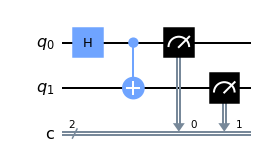

In [36]:
#Visualize circuits แสดงภาพวงจรที่เราสร้างไว้
circuit.draw(output='mpl')

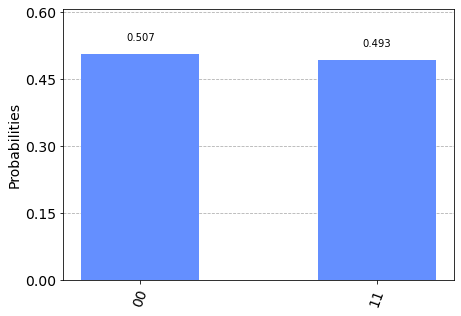

In [37]:
#โชว์ผลลัพธ์ ด้วยกราฟ
plot_histogram(counts)